<a href="https://colab.research.google.com/github/202218031/DM_Project_1/blob/202218051_Bhavisha/DM_CP1_Predicting_Total_Sales_Price_per_Carat_Weight.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv("/content/drive/MyDrive/diamonds.csv")

# **Data Description**

# **What is the size of data?**

In [4]:
df.shape

(219703, 26)

# **How does the data look like?**

In [5]:
df.head()

,Unnamed: 0,cut,color,clarity,carat_weight,cut_quality,lab,symmetry,polish,eye_clean,...,meas_depth,girdle_min,girdle_max,fluor_color,fluor_intensity,fancy_color_dominant_color,fancy_color_secondary_color,fancy_color_overtone,fancy_color_intensity,total_sales_price
0,0,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.79,M,M,unknown,None,unknown,unknown,unknown,unknown,200
1,1,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Very Good,unknown,...,1.78,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200
2,2,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.77,TN,M,unknown,None,unknown,unknown,unknown,unknown,200
3,3,Round,E,VVS2,0.09,Excellent,IGI,Very Good,Very Good,unknown,...,1.78,M,STK,unknown,None,unknown,unknown,unknown,unknown,200
4,4,Round,E,VVS2,0.09,Very Good,IGI,Very Good,Excellent,unknown,...,1.82,STK,STK,unknown,None,unknown,unknown,unknown,unknown,200


# **What are the datatypes of columns?**

In [6]:
df.dtypes

Unnamed: 0                       int64
cut                             object
color                           object
clarity                         object
carat_weight                   float64
cut_quality                     object
lab                             object
symmetry                        object
polish                          object
eye_clean                       object
culet_size                      object
culet_condition                 object
depth_percent                  float64
table_percent                  float64
meas_length                    float64
meas_width                     float64
meas_depth                     float64
girdle_min                      object
girdle_max                      object
fluor_color                     object
fluor_intensity                 object
fancy_color_dominant_color      object
fancy_color_secondary_color     object
fancy_color_overtone            object
fancy_color_intensity           object
total_sales_price        

# **Does the data contain missing values?**

In [7]:
print(df.isnull().sum())

Unnamed: 0                     0
cut                            0
color                          0
clarity                        0
carat_weight                   0
cut_quality                    0
lab                            0
symmetry                       0
polish                         0
eye_clean                      0
culet_size                     0
culet_condition                0
depth_percent                  0
table_percent                  0
meas_length                    0
meas_width                     0
meas_depth                     0
girdle_min                     0
girdle_max                     0
fluor_color                    0
fluor_intensity                0
fancy_color_dominant_color     0
fancy_color_secondary_color    0
fancy_color_overtone           0
fancy_color_intensity          0
total_sales_price              0
dtype: int64


# **Are there any duplicates?**

In [8]:
df.duplicated().sum()

0

# **How does the data look like mathematically?**

In [9]:
df.describe()

,Unnamed: 0,carat_weight,depth_percent,table_percent,meas_length,meas_width,meas_depth,total_sales_price
count,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,219703.000000,2.197030e+05
mean,109851.747418,0.755176,61.683768,57.747585,5.548853,5.135626,3.285699,6.908062e+03
std,63423.264419,0.845894,9.915266,9.959928,1.763924,1.374529,2.054822,2.595949e+04
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000e+02
25%,54925.500000,0.310000,61.200000,57.000000,4.350000,4.310000,2.680000,9.580000e+02
50%,109852.000000,0.500000,62.400000,58.000000,5.060000,4.800000,3.030000,1.970000e+03
75%,164777.500000,1.000000,63.500000,60.000000,6.350000,5.700000,3.630000,5.207000e+03
max,219703.000000,19.350000,98.700000,94.000000,93.660000,62.300000,76.300000,1.449881e+06


# **What are the number of unique values in each column?**

In [10]:
df.nunique()

Unnamed: 0                     219703
cut                                11
color                              11
clarity                            11
carat_weight                      878
cut_quality                         6
lab                                 3
symmetry                            5
polish                              5
eye_clean                           5
culet_size                          9
culet_condition                     4
depth_percent                     534
table_percent                     235
meas_length                      1415
meas_width                       1155
meas_depth                        852
girdle_min                         10
girdle_max                         10
fluor_color                         6
fluor_intensity                     8
fancy_color_dominant_color         13
fancy_color_secondary_color        11
fancy_color_overtone                9
fancy_color_intensity              10
total_sales_price               22202
dtype: int64

In [11]:
for column_name, column in df.iteritems():
    if column.dtype == 'object':
        unique_values = column.unique()
        print(f'Unique values in categorical column "{column_name}":')
        print(unique_values)
        print()

<ipython-input-11-8c9d2a96021d>:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for column_name, column in df.iteritems():


Unique values in categorical column "cut":
['Round' 'Pear' 'Oval' 'Marquise' 'Princess' 'Emerald' 'Heart' 'Cushion'
 'Radiant' 'Cushion Modified' 'Asscher']

Unique values in categorical column "color":
['E' 'F' 'L' 'D' 'J' 'I' 'G' 'H' 'M' 'K' 'unknown']

Unique values in categorical column "clarity":
['VVS2' 'VVS1' 'I1' 'VS1' 'VS2' 'IF' 'SI2' 'I2' 'SI1' 'SI3' 'I3']

Unique values in categorical column "cut_quality":
['Excellent' 'Very Good' 'unknown' 'Good' 'Fair' 'Ideal']

Unique values in categorical column "lab":
['IGI' 'GIA' 'HRD']

Unique values in categorical column "symmetry":
['Very Good' 'Excellent' 'Good' 'Fair' 'Poor']

Unique values in categorical column "polish":
['Very Good' 'Excellent' 'Good' 'Fair' 'Poor']

Unique values in categorical column "eye_clean":
['unknown' 'Yes' 'E1' 'Borderline' 'No']

Unique values in categorical column "culet_size":
['N' 'unknown' 'S' 'M' 'VS' 'L' 'EL' 'SL' 'VL']

Unique values in categorical column "culet_condition":
['unknown' 'Abraded' 

In [12]:
# df = df[df != "None"].dropna()
# df = df[df != "unknown"].dropna()
# df.shape

# **Dropping columns that contain more 'unknown' values**

In [13]:
threshold = 40

unknown_percentage = (df == 'unknown').mean() * 100

columns_to_drop = unknown_percentage[unknown_percentage >= threshold].index

columns_to_drop

df.drop(columns=columns_to_drop, inplace=True)

In [14]:
threshold = 40

None_percentage = (df == 'None').mean() * 100

columns_to_drop = None_percentage[None_percentage >= threshold].index

columns_to_drop

df.drop(columns=columns_to_drop, inplace=True)

In [15]:
print(df.shape)

(219703, 18)


# **Detecting and Handling Outliers**

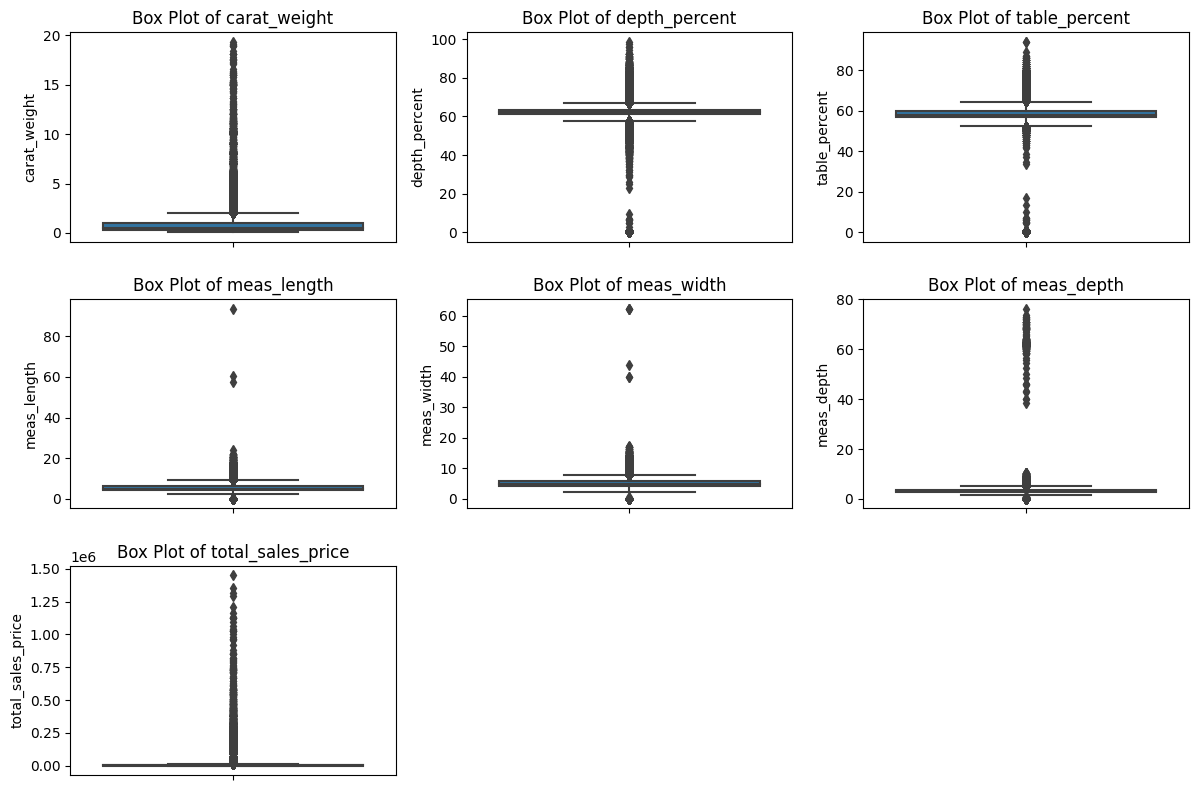

In [16]:
numerical_columns = ['carat_weight', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth', 'total_sales_price']

plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [17]:
def handle_outliers(column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    df[column] = np.where(df[column] < lower_bound, lower_bound, df[column])
    df[column] = np.where(df[column] > upper_bound, upper_bound, df[column])

In [18]:
for column in numerical_columns:
    handle_outliers(column)

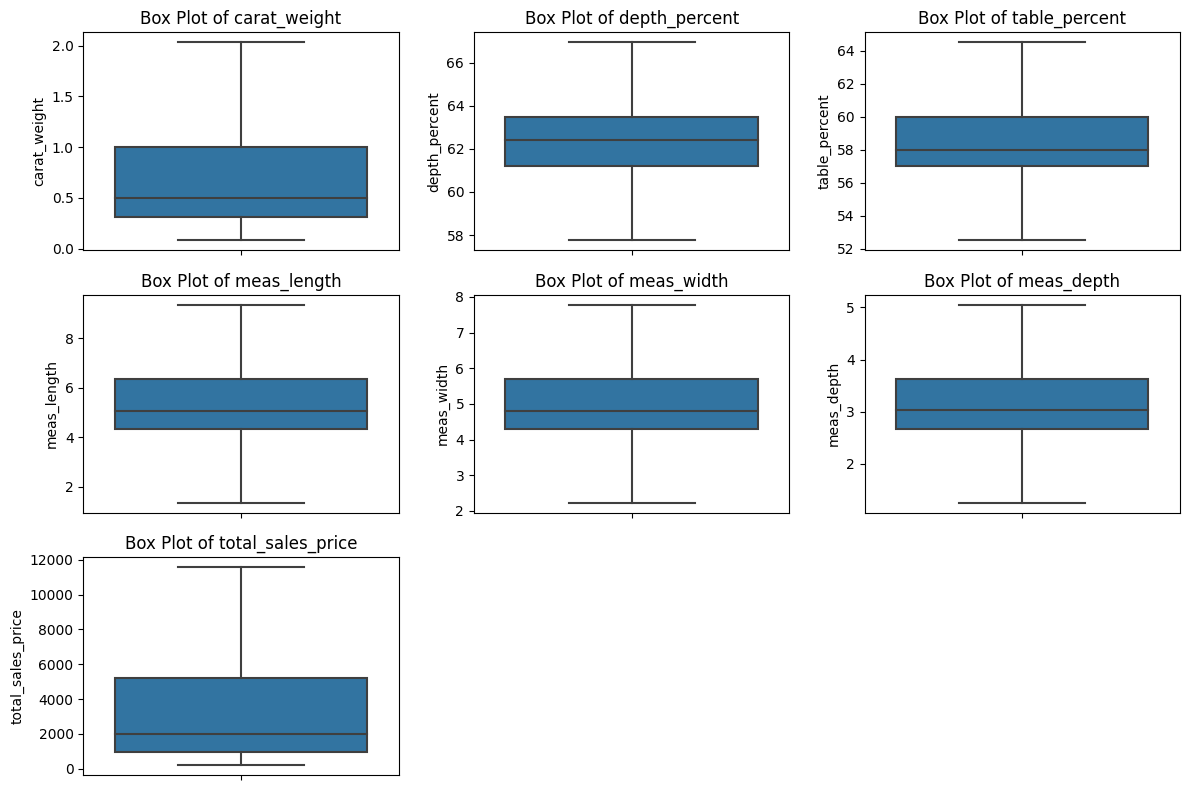

In [19]:
plt.figure(figsize=(12, 8))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data=df, y=column)
    plt.title(f'Box Plot of {column}')
    plt.ylabel(column)

plt.tight_layout()
plt.show()

In [20]:
df.dtypes

Unnamed: 0             int64
cut                   object
color                 object
clarity               object
carat_weight         float64
cut_quality           object
lab                   object
symmetry              object
polish                object
culet_size            object
depth_percent        float64
table_percent        float64
meas_length          float64
meas_width           float64
meas_depth           float64
girdle_min            object
girdle_max            object
total_sales_price    float64
dtype: object

# **Encoding of Variables**

In [21]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

label_encoder = LabelEncoder()
for column in df.columns:
    if df[column].dtype == 'object':
        df[column] = label_encoder.fit_transform(df[column])

# **Standarizing the features**

In [22]:
from sklearn.preprocessing import StandardScaler

numerical_cols = ['carat_weight', 'depth_percent', 'table_percent', 'meas_length', 'meas_width', 'meas_depth','girdle_min', 'girdle_max']

scaler = StandardScaler()

df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

# **Predicting Total Sales Price per Carat Weight**

In [38]:
from sklearn.model_selection import train_test_split
X = df[['carat_weight']]  # Feature: carat_weight
y = df['total_sales_price']  # Target: total_sales_price

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [39]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [40]:
from sklearn.metrics import mean_absolute_error, r2_score
y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)

mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")

carat_weight_to_predict = 1.5  # Replace with the desired carat_weight
predicted_price = model.predict(np.array([[carat_weight_to_predict]]))
print(f"Predicted total_sales_price for {carat_weight_to_predict} carat(s): {predicted_price[0]}")

Mean Absolute Error (MAE): 880.5235200598228
R-squared: 0.8525337241221578
Predicted total_sales_price for 1.5 carat(s): 8931.485485146703


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


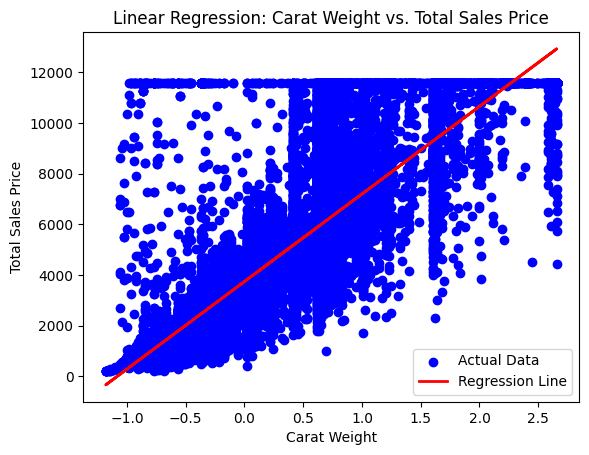

In [42]:
# Plot the regression line
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Regression Line')
plt.xlabel('Carat Weight')
plt.ylabel('Total Sales Price')
plt.legend()
plt.title('Linear Regression: Carat Weight vs. Total Sales Price')
plt.show()

Mean Absolute Error: 832.169402228368
R-squared: 0.8650544017791917


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


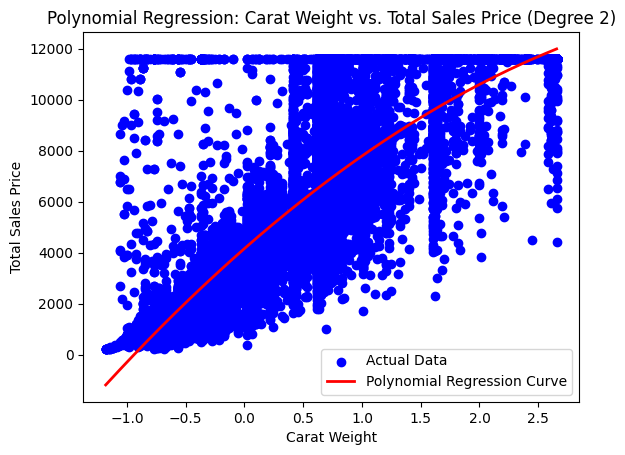

In [43]:
from sklearn.preprocessing import PolynomialFeatures

# Extract the relevant columns
X = df[['carat_weight']]
y = df['total_sales_price']

# Split the data into training and testing sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mse}")
print(f"R-squared: {r2}")

# Plot the polynomial regression curve
X_sorted = np.sort(X_test.values, axis=0)
y_poly_pred = model.predict(poly.transform(X_sorted))

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_sorted, y_poly_pred, color='red', linewidth=2, label='Polynomial Regression Curve')
plt.xlabel('Carat Weight')
plt.ylabel('Total Sales Price')
plt.legend()
plt.title('Polynomial Regression: Carat Weight vs. Total Sales Price (Degree 2)')
plt.show()


Mean Absolute Error: 712.3520730295477
R-squared: 0.8776500499424463


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


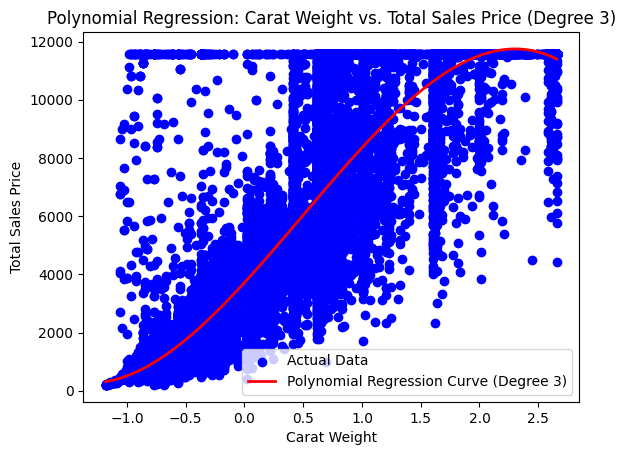

In [44]:
# Extract the relevant columns
X = df[['carat_weight']]
y = df['total_sales_price']

# Split the data into training and testing sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 3)
poly = PolynomialFeatures(degree=3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Create and train the polynomial regression model
model = LinearRegression()
model.fit(X_train_poly, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test_poly)

# Evaluate the model
mse = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error: {mse}")
print(f"R-squared: {r2}")

# Plot the polynomial regression curve
X_sorted = np.sort(X_test.values, axis=0)
y_poly_pred = model.predict(poly.transform(X_sorted))

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_sorted, y_poly_pred, color='red', linewidth=2, label='Polynomial Regression Curve (Degree 3)')
plt.xlabel('Carat Weight')
plt.ylabel('Total Sales Price')
plt.legend()
plt.title('Polynomial Regression: Carat Weight vs. Total Sales Price (Degree 3)')
plt.show()

# **APPLYING RIDGE and LASSO REGRESSION to TEST:**

Ridge Regression:
Mean Squared Error: 832.1656488430282
R-squared: 0.865054412809848



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


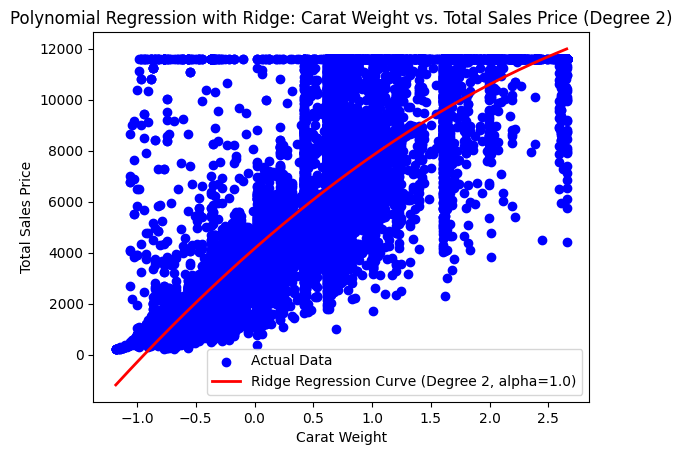

In [49]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error, r2_score

# Extract the relevant columns
X = df[['carat_weight']]
y = df['total_sales_price']

# Split the data into training and testing sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Apply Ridge regularization
ridge_alpha = 1.0  # You can adjust the regularization strength for Ridge
ridge_model = Ridge(alpha=ridge_alpha)
ridge_model.fit(X_train_poly, y_train)
y_ridge_pred = ridge_model.predict(X_test_poly)

# Evaluate Ridge model
mse_ridge = mean_absolute_error(y_test, y_ridge_pred)
r2_ridge = r2_score(y_test, y_ridge_pred)

print("Ridge Regression:")
print(f"Mean Squared Error: {mse_ridge}")
print(f"R-squared: {r2_ridge}\n")

# Plot the polynomial regression curves
X_sorted = np.sort(X_test.values, axis=0)
y_poly_ridge_pred = ridge_model.predict(poly.transform(X_sorted))
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_sorted, y_poly_ridge_pred, color='red', linewidth=2, label=f'Ridge Regression Curve (Degree 2, alpha={ridge_alpha})')
plt.xlabel('Carat Weight')
plt.ylabel('Total Sales Price')
plt.legend()
plt.title('Polynomial Regression with Ridge: Carat Weight vs. Total Sales Price (Degree 2)')
plt.show()


Lasso Regression:
Mean Squared Error: 831.9843963000285
R-squared: 0.8650547473606987



/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


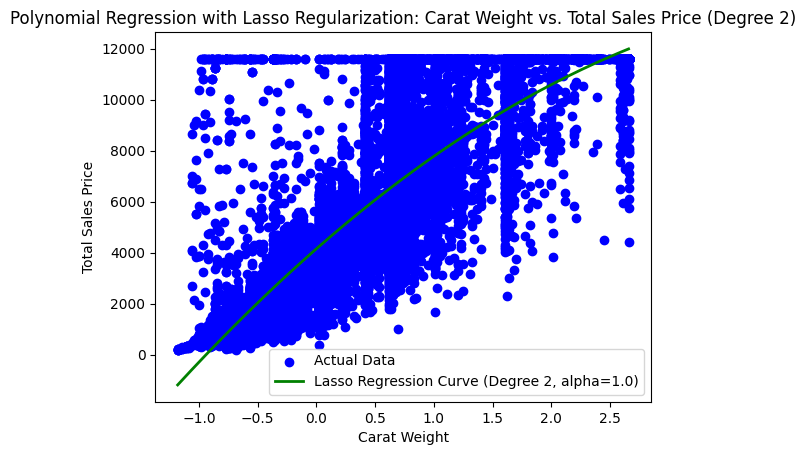

In [51]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error, r2_score


# Extract the relevant columns
X = df[['carat_weight']]
y = df['total_sales_price']

# Split the data into training and testing sets (e.g., 80% training and 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create polynomial features (degree 2)
poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Apply Lasso regularization
lasso_alpha = 1.0  # You can adjust the regularization strength for Lasso
lasso_model = Lasso(alpha=lasso_alpha)
lasso_model.fit(X_train_poly, y_train)
y_lasso_pred = lasso_model.predict(X_test_poly)

# Evaluate Lasso model
mse_lasso = mean_absolute_error(y_test, y_lasso_pred)
r2_lasso = r2_score(y_test, y_lasso_pred)


print("Lasso Regression:")
print(f"Mean Squared Error: {mse_lasso}")
print(f"R-squared: {r2_lasso}\n")


# Plot the polynomial regression curves
X_sorted = np.sort(X_test.values, axis=0)
y_poly_ridge_pred = ridge_model.predict(poly.transform(X_sorted))
y_poly_lasso_pred = lasso_model.predict(poly.transform(X_sorted))

plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_sorted, y_poly_lasso_pred, color='green', linewidth=2, label=f'Lasso Regression Curve (Degree 2, alpha={lasso_alpha})')
plt.xlabel('Carat Weight')
plt.ylabel('Total Sales Price')
plt.legend()
plt.title('Polynomial Regression with Lasso Regularization: Carat Weight vs. Total Sales Price (Degree 2)')
plt.show()


There is almost no difference **before** and **after** applying Regularization Parameter on 2nd degree linear regression model, by this we can confidently say that our model is accurate and is perfectly fitted.